# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

# Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation
- Am verificat valorile lipsă pentru fiecare coloană și nu am identificat nicio valoare lipsa, acestea fiind înlocuite cu "?".  
- Am calculat statisticile descriptive precum medie median mod, precum și skewness și kurtosis și am obținut histograma distribuției - care ne arată o distribuție leptocurtică.
- Am utilizat boxplots pentru mai multe variabile numerice și am identificat outlierii.
- Am folosit histograme pentu mai multe variabile numerice și am identificat distribuții asimetrice (de exemplu, pentru age, avem o distribuție asimetrică, în forma de i, right-skewed).
- Am uilizat diagramele cu bară pentru a identifica frecvența de apariție a categoriilor a diverselor variabile categoriale iar aceste frecvențe sunt aproximativ similare atît pentru gen, cât și pentru rasă sau situație familială.
- Am creat un matrix de corelație și putem observa că există corelații foarte slabe între variabile, cea mai puternică fiind de .15.
- Am realizat un scatterplot între education și hours-per-week.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
30393,39,Private,48915,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
13785,66,Private,244661,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
8486,25,Private,430084,Some-college,10,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,United-States,<=50K
21517,31,Private,288566,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,43,United-States,>50K
24899,51,Private,355551,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,45,Mexico,<=50K
18208,26,Private,64289,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
30158,29,?,208406,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
16143,40,Federal-gov,112388,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
5882,36,Private,261382,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,15024,0,45,United-States,>50K
14226,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K


In [3]:
print("\nProcent lipsuri pe coloană (%):")
print((data.isna().mean() * 100).round(2))


Procent lipsuri pe coloană (%):
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print("Skew:")
print(data.skew(numeric_only=True).sort_values())
print("\nKurt:")
data.kurtosis(numeric_only=True).sort_values()

Skew:
education-num     -0.311676
hours-per-week     0.227643
age                0.558743
fnlwgt             1.446980
capital-loss       4.594629
capital-gain      11.953848
dtype: float64

Kurt:


age                -0.166127
education-num       0.623444
hours-per-week      2.916687
fnlwgt              6.218811
capital-loss       20.376802
capital-gain      154.799438
dtype: float64

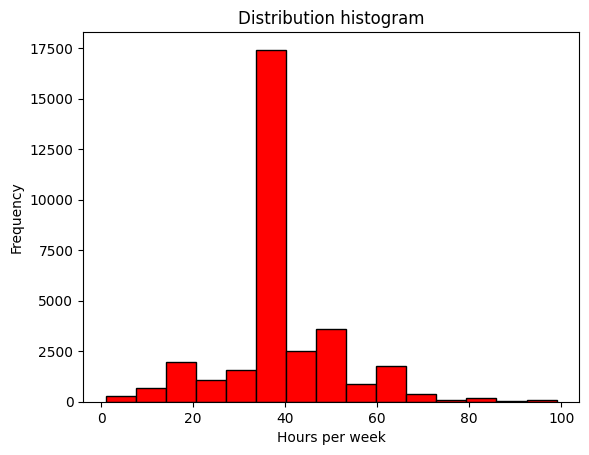

In [6]:
plt.hist(data['hours-per-week'], bins=15, color='red', edgecolor='black')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.title('Distribution histogram')
plt.show()

<Axes: xlabel='hours-per-week', ylabel='Count'>

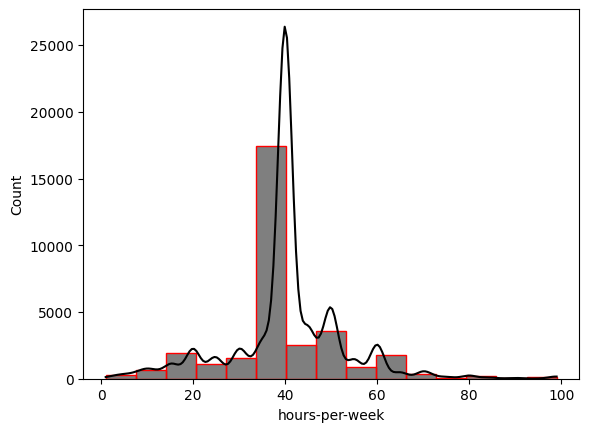

In [7]:
sns.histplot(data["hours-per-week"], bins=15, kde=True, color='black', edgecolor='red')

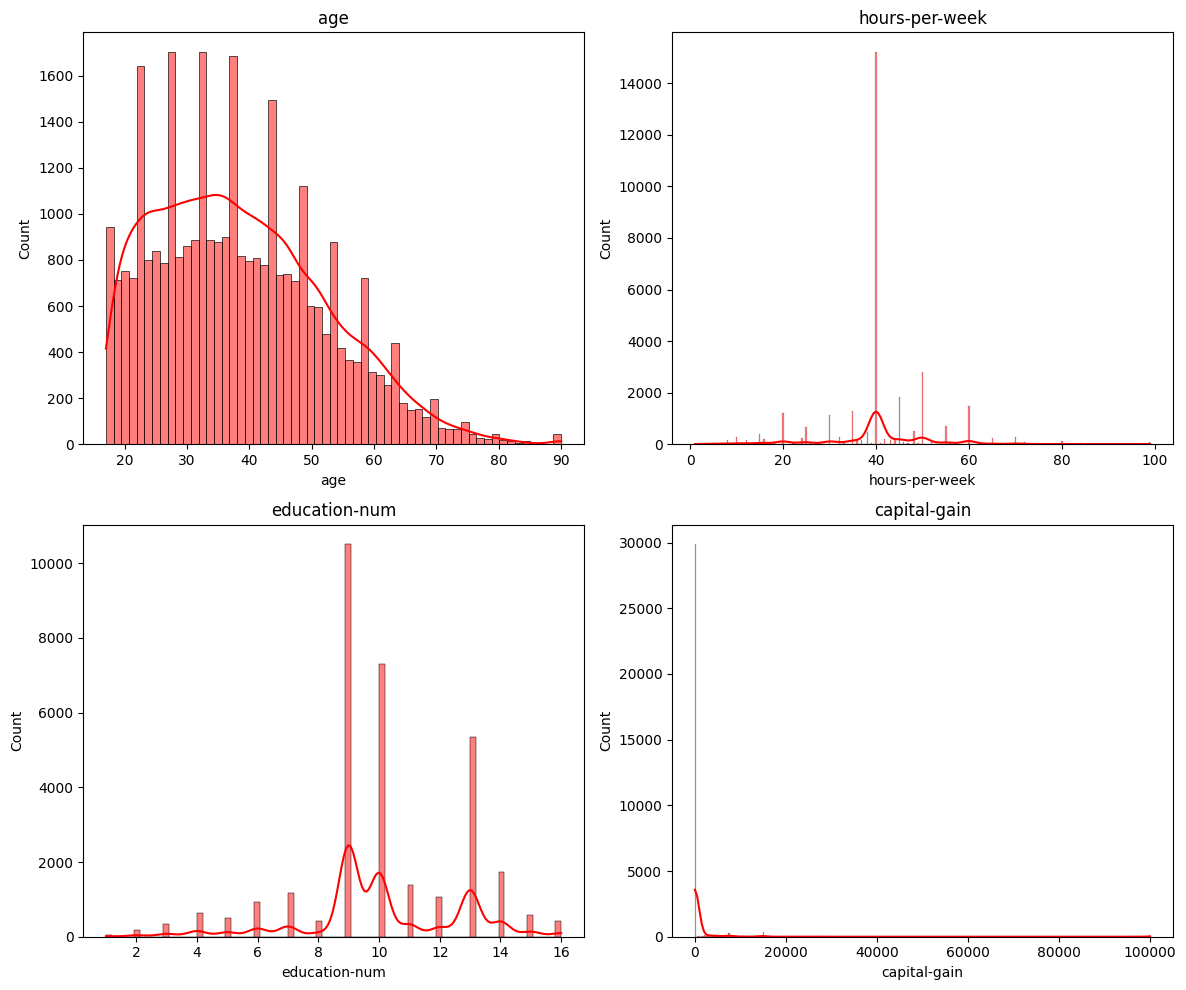

In [8]:
cols_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain'] 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(['age', 'hours-per-week', 'education-num', 'capital-gain']):
    sns.histplot(data[col], ax=axes[i], kde=True, color = 'red')
    axes[i].set_title(col)

plt.tight_layout()

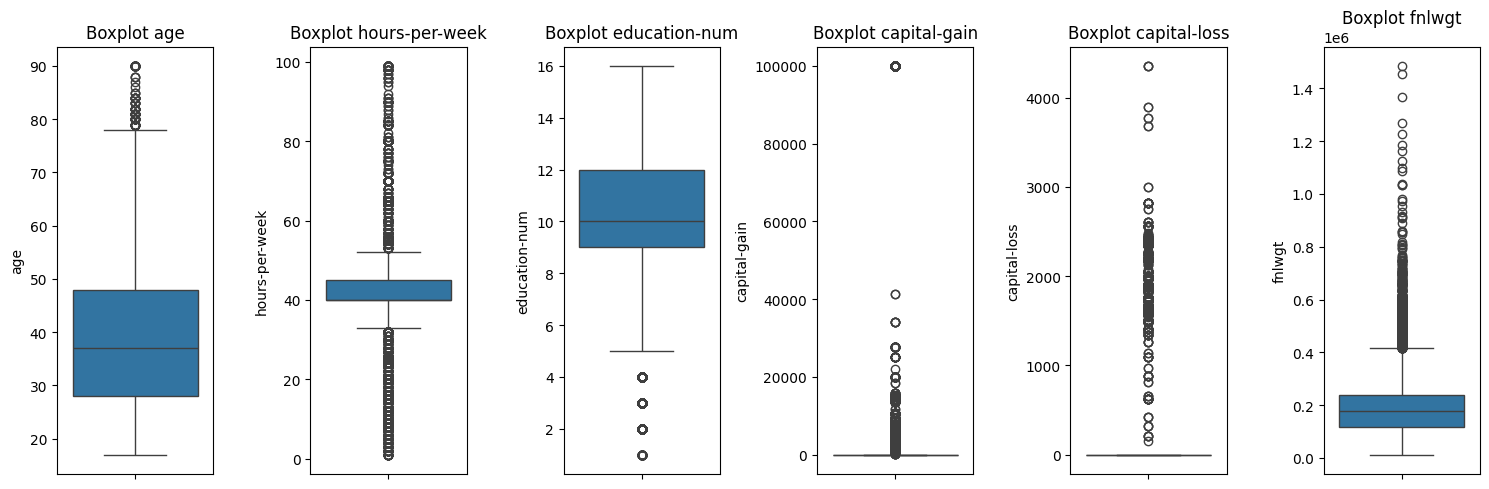

In [9]:
cols_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss', 'fnlwgt'] 

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(15, 5))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

<Axes: ylabel='sex'>

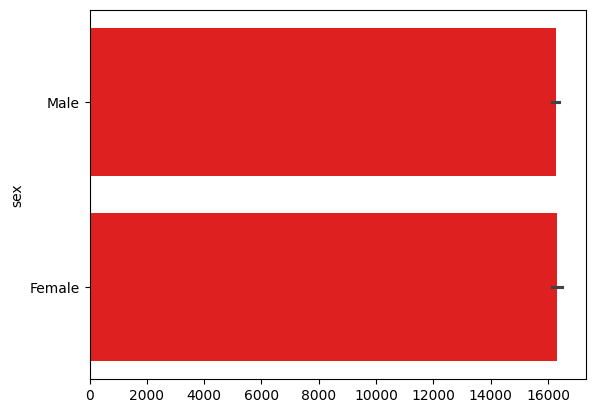

In [10]:
sns.barplot(data['sex'], color = 'red')

<Axes: ylabel='race'>

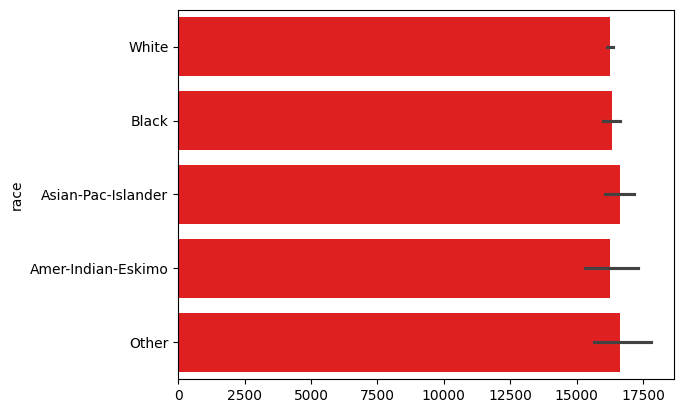

In [11]:
sns.barplot(data['race'], color = 'red')

<Axes: ylabel='relationship'>

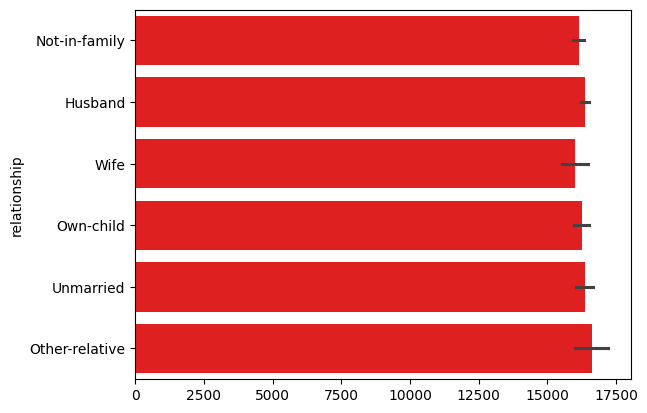

In [12]:
sns.barplot(data['relationship'], color = 'red')

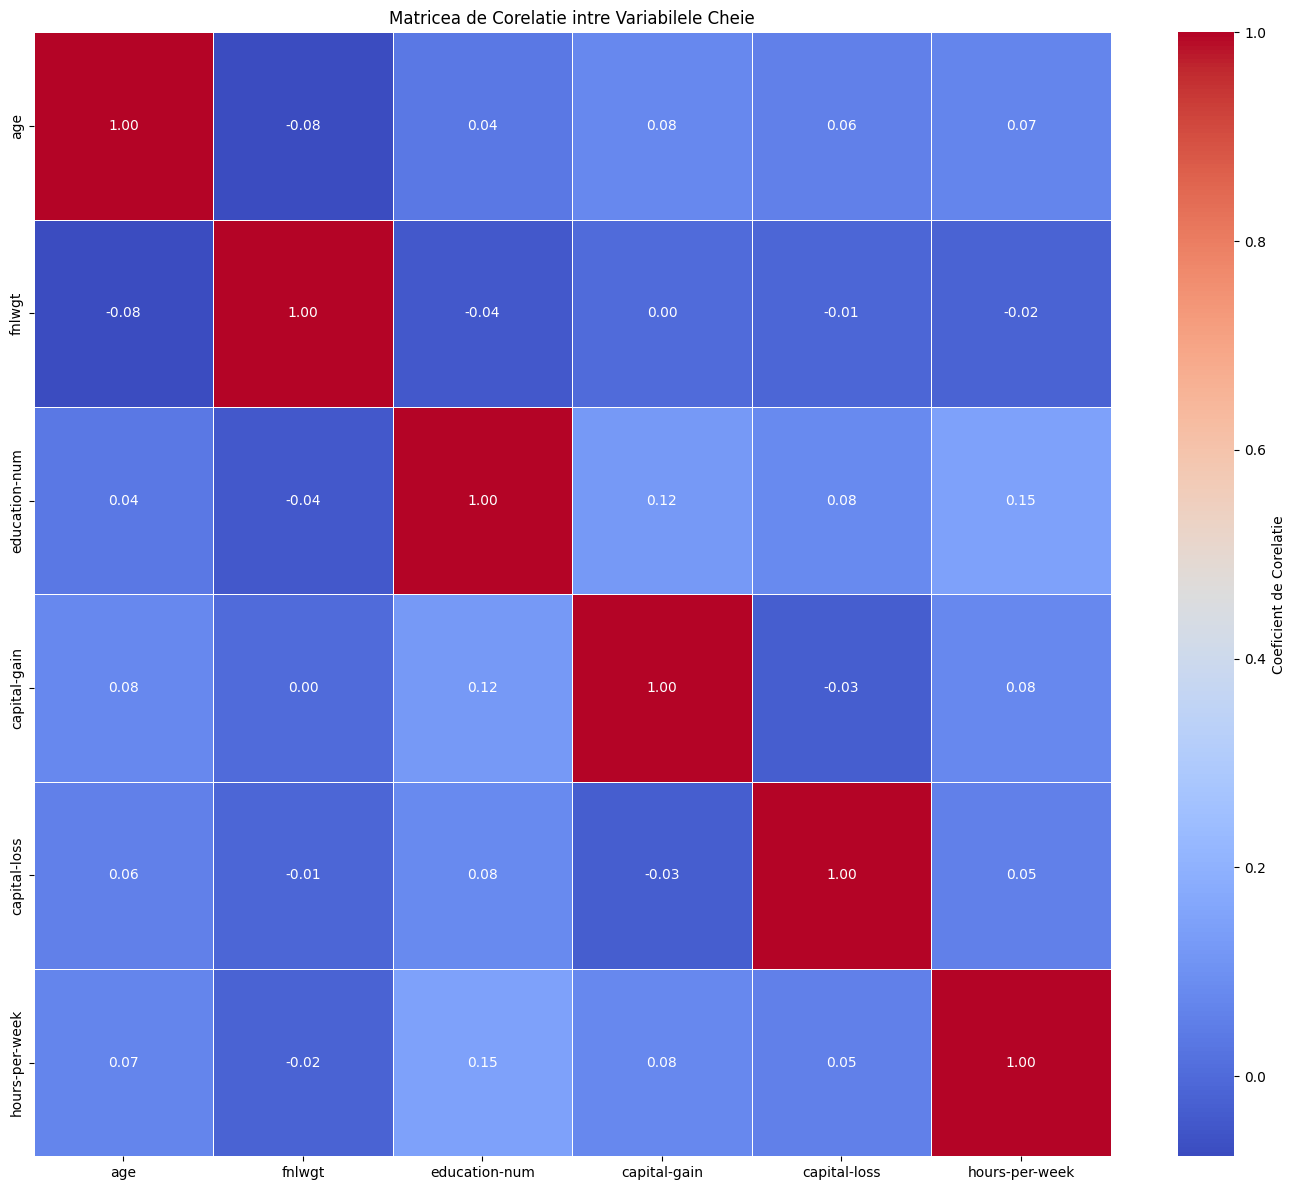

In [13]:
df_corr = data.select_dtypes(include= 'number')

correlation_matrix = df_corr.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,       
    fmt=".2f",        
    cmap='coolwarm', 
    linewidths=.5,     
    cbar_kws={'label': 'Coeficient de Corelatie'}
)
plt.title('Matricea de Corelatie intre Variabilele Cheie')
plt.tight_layout()
plt.show()

<Axes: xlabel='hours-per-week', ylabel='education-num'>

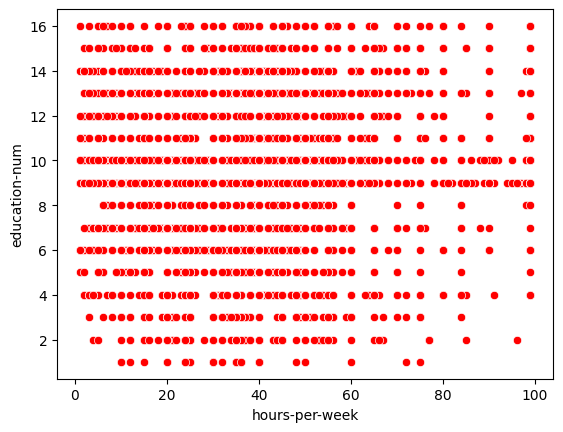

In [14]:
sns.scatterplot(data = data, x = 'hours-per-week', y = 'education-num', color = 'red')

# AM RULAT DIN NOU CODUL, PENTRU DATELE PROCESATE DIN TASK-UL 1


Procent lipsuri pe coloană (%):
age               0.0
workclass         0.0
fnlwgt            0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64
Skew:
education-num     -0.310354
hours-per-week     0.331819
age                0.531696
fnlwgt             1.457210
capital-loss       4.514329
capital-gain      11.785882
dtype: float64

Kurt:


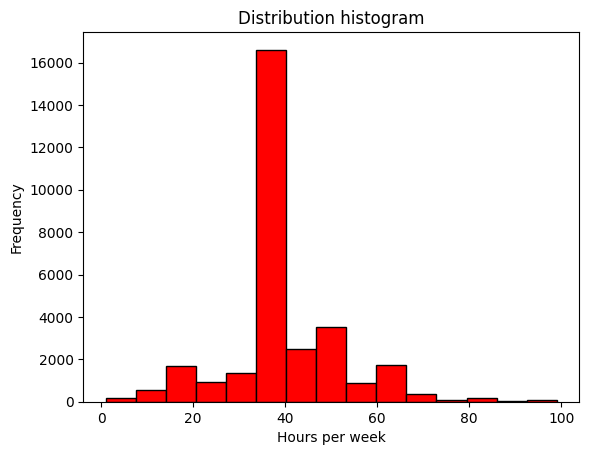

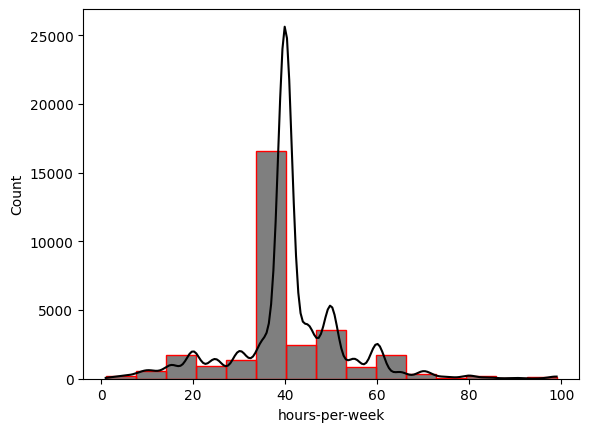

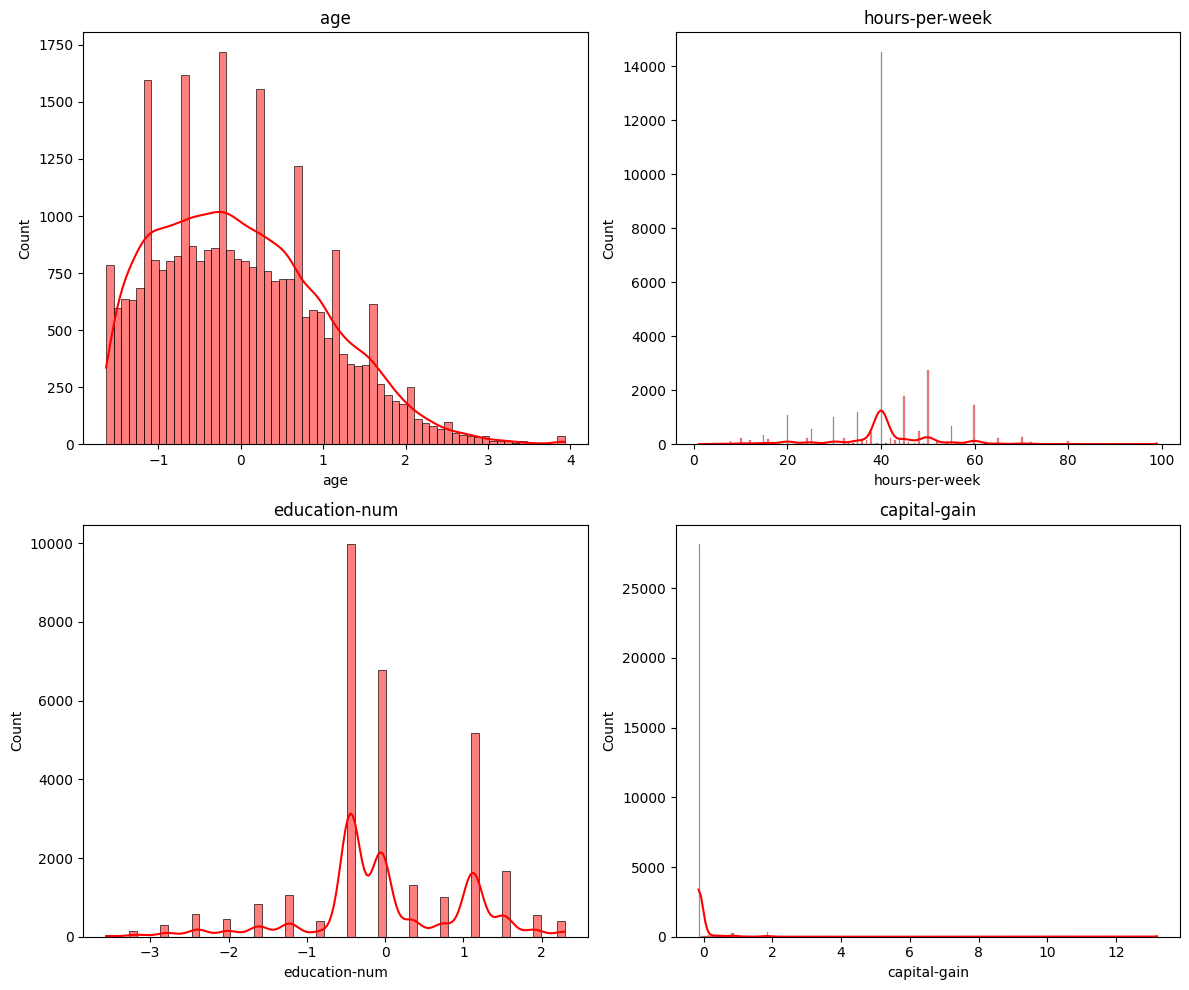

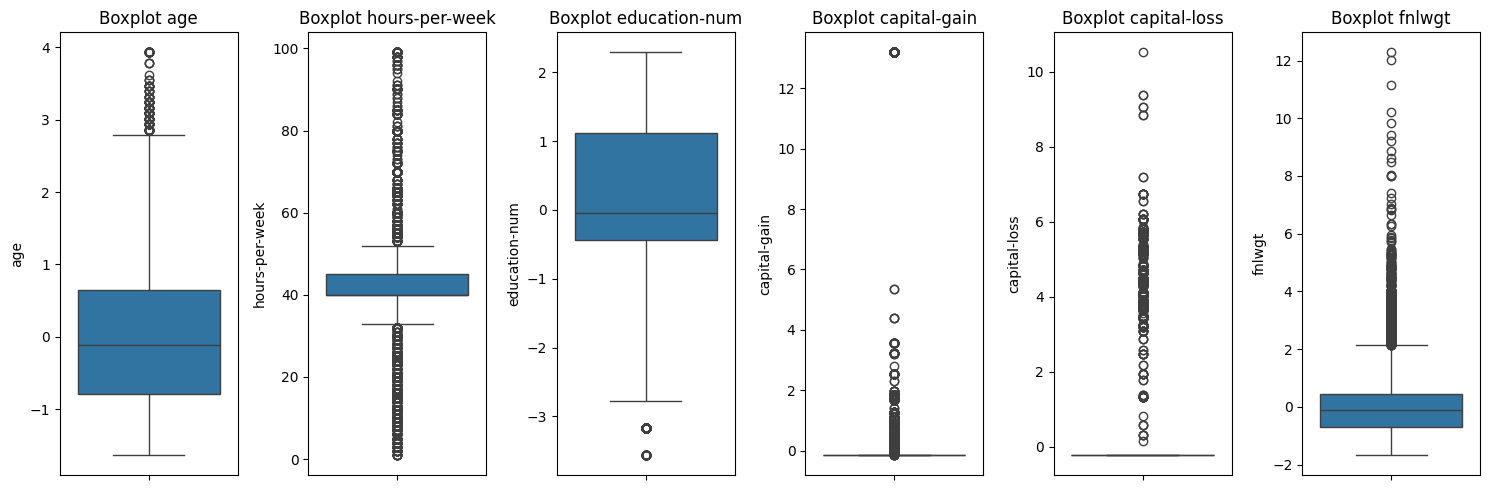

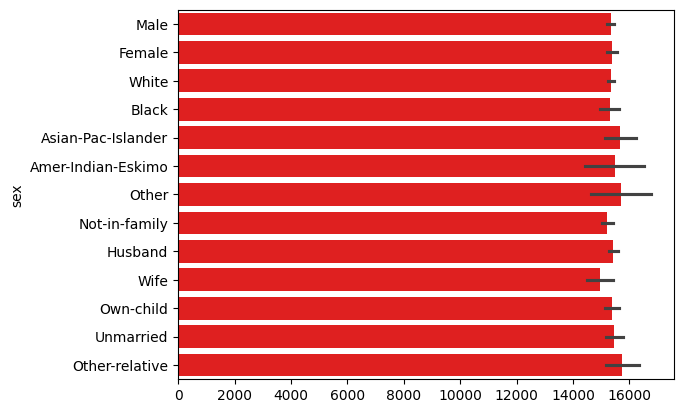

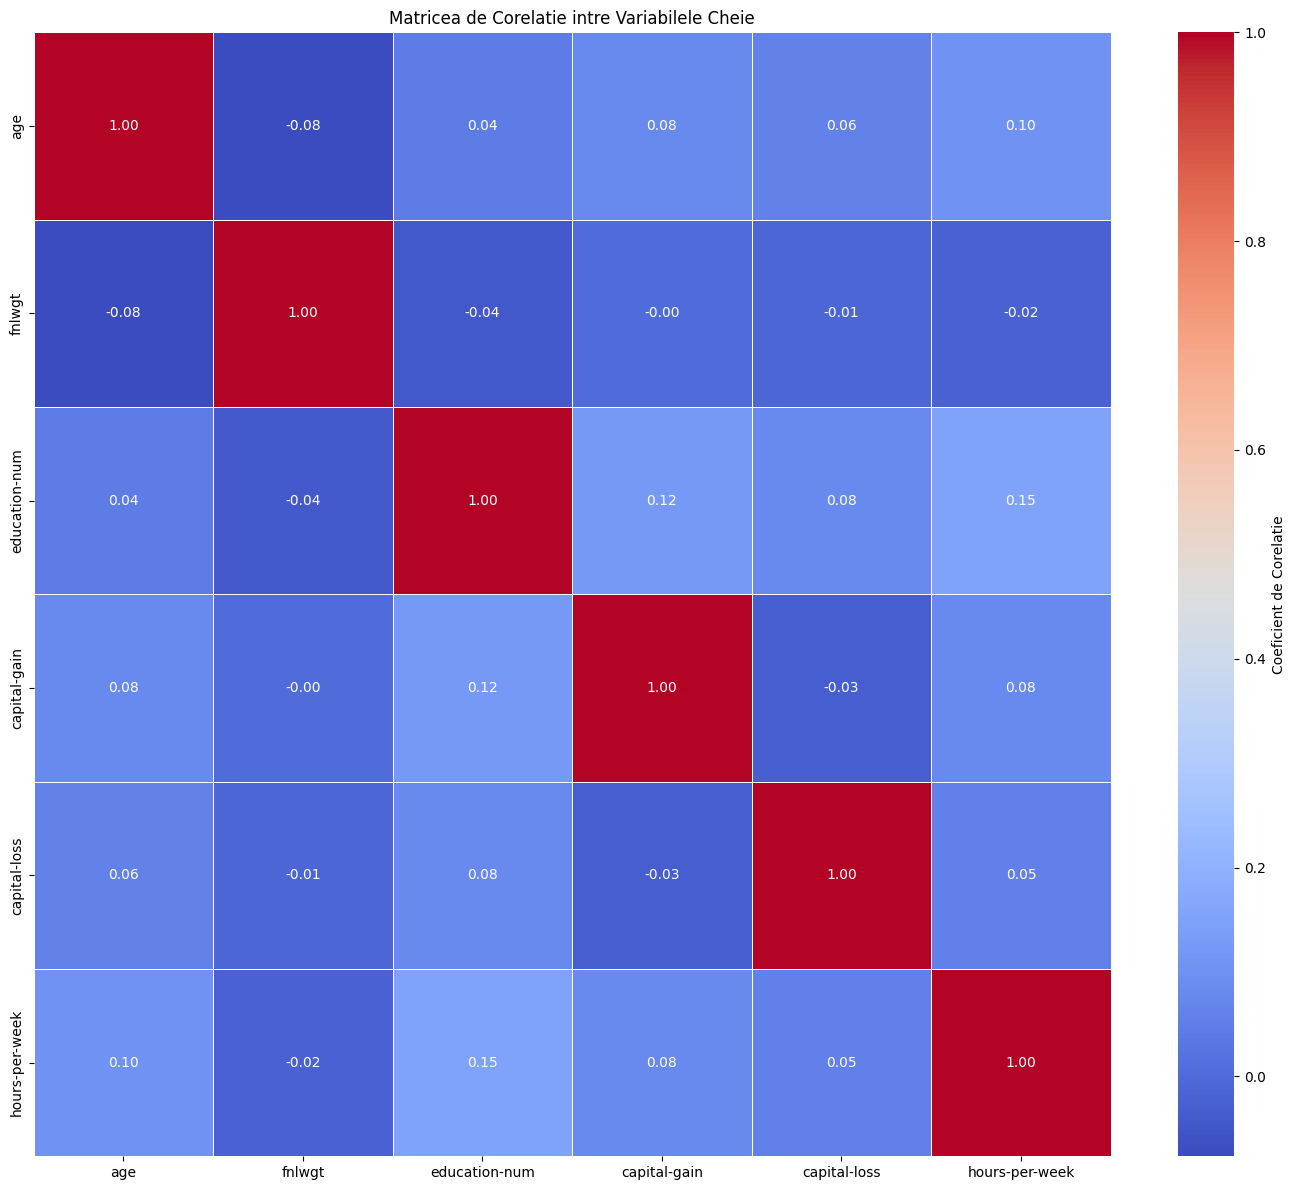

<Axes: xlabel='hours-per-week', ylabel='education-num'>

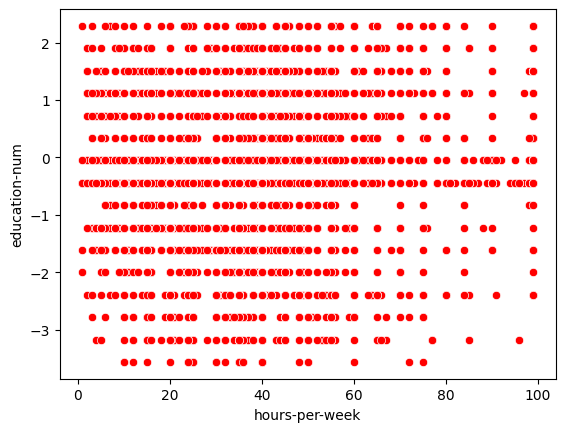

In [15]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
data2 = pd.read_csv('adult_data_t2')

# %%
print("\nProcent lipsuri pe coloană (%):")
print((data2.isna().mean() * 100).round(2))

# %%
data2.describe()

# %%
print("Skew:")
print(data2.skew(numeric_only=True).sort_values())
print("\nKurt:")
data2.kurtosis(numeric_only=True).sort_values()

# %%
plt.hist(data2['hours-per-week'], bins=15, color='red', edgecolor='black')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.title('Distribution histogram')
plt.show()

# %%
sns.histplot(data2["hours-per-week"], bins=15, kde=True, color='black', edgecolor='red')

# %%
cols_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain'] 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(['age', 'hours-per-week', 'education-num', 'capital-gain']):
    sns.histplot(data2[col], ax=axes[i], kde=True, color = 'red')
    axes[i].set_title(col)

plt.tight_layout()

# %%
cols_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss', 'fnlwgt'] 

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(15, 5))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=data2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# %%
sns.barplot(data2['sex'], color = 'red')

# %%
sns.barplot(data2['race'], color = 'red')

# %%
sns.barplot(data2['relationship'], color = 'red')

# %%
df_corr = data2.select_dtypes(include= 'number')

correlation_matrix = df_corr.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,       
    fmt=".2f",        
    cmap='coolwarm', 
    linewidths=.5,     
    cbar_kws={'label': 'Coeficient de Corelatie'}
)
plt.title('Matricea de Corelatie intre Variabilele Cheie')
plt.tight_layout()
plt.show()

# %%
sns.scatterplot(data = data2, x = 'hours-per-week', y = 'education-num', color = 'red')


